# Introduction
## Alberta Post-secondary Graduate Earnings by Field of Study

Based on our primary needs and societal expectations, it has become a necessity to work or ‘earn a living’ in today world. It is also well established that the effect of education on earnings is significant regardless of location [1]. Growing competition in the job market has led to a higher emphasis on post-secondary education with respect to successfully acquiring a job or career. Post-secondary education also plays an important role to with respect to median income a person may expect to earn, however, it may not be the most important factor many consider. Other factors such as opportunities, passion, job flexibility, affordability, a person’s capabilities, etc. we would also expect to play a significant role in a person decision as to which level of post-secondary study to pursue.

We hope to show that higher education is a worthy investment as it increases a person’s chances of earning more and gaining exposure to other opportunities. Due to the increasing expenses and radical changes (i.e., automation and influence of artificial intelligence, remote work) in the job sector we find this an important topic to investigate. We also will attempt to find, if there exists, an optimal level of study or field to pursue with respect to median income. We think our primary audience, student pursuing a MSc., will appreciate our group projects analysis and results. Our data set we chose to analyze is "Alberta Post-Secondary Graduate Earnings by Field of Study" [2]. Here we hope to answer a multitude of questions surrounding median income and cohort sizes for various fields and levels of education and to present our findings using visual aids that are intuitive.

## Dataset
The analysis of this project based on the dataset was obtained from the Open Data portal of the Alberta Government. It was created on October 15, 2019, by Advanced Education, and was last seen modified on the same day. Its usage is under Open Government License – Alberta. Under this license, the data provider grants us the permission to copy, modify and publish the information for our analysis. The “Alberta Post-secondary Graduate Earnings by Field of Study” data set is a publicly funded survey  that involved over 2500 participants in various fields of study. This dataset collects the income information of the Graduates from Alberta's publicly funded post-secondary institutions between 2005 and 2014. Income information is collected by linking Alberta Learner Enrolment Reporting System (LERS) data, which captures information about students and enrolment in all credit programs offered by public post-secondary institutions in Alberta, to Statistics Canada’s T1 Family File (T1FF) tax information. Income information is aggregated and presented as a median one, two, five and ten years after graduation. The results are broken down by year of graduation, credential, and field of study. Classification of Instructional Program (CIP) codes (two- and four-digit)[3] are used to classify programs according to the field of study.

There are six key features in our data set

* **Credential** - A qualification resulting in the completion of a parchment program. Note: professional degree includes undergraduate degree and post-baccalaureate non-graduate degree programs in the following fields of study: law (LLB, JD, BCL); medicine (MD); dentistry (DDS, DMD); veterinary medicine (DVM); and pharmacy (PharmD, BS, BSc, BPharm).
* **Graduating Cohort** -	Based on the calendar year in which an individual becomes a graduate.   
* **Field of study** -	Based on Classification of Instructional Programs (CIP) Canada 2011 codes; a hierarchical arrangement of program classification, as defined by Statistics Canada . Two-digit and four-digit CIP codes are included. Two-digit CIP series codes are the most general groupings of related programs. Four-digit CIP sub-series codes provide an intermediate grouping of programs that have comparable content and objectives.
* **Years After Graduation** -	The number of years that have passed since graduation. Income information is collected in the first tax year following the year of graduation to allow adequate time for graduates to find employment.
* **Median Income** -	For a specified group is the value that divides the employment income distribution of that group into two halves, i.e., the incomes of half of the graduates in that group are below the median, while the other half are above the median. The median income is expressed in 2015 constant dollars using the Alberta Consumer Price Index All Items (CPI). The median income for each cohort is randomly rounded to a base of $100.
* **Cohort size** -	The number of graduates for which tax records are available, rounded to a base of ten.

Our analysis explores this data set and visualizes the outcomes for the decision-making process. This analysis points out the earning trajectories of post-secondary graduate earnings. This report represents an overall scenario about the post-secondary education effects on median income based on the field of study, years of experience, job compensation etc. We have also searched the correlation between our data set and subsequent data sets to understand the trend on opportunities that allow us to determine how factors such as; job security, interdependence among certain fields and industries, changes in median income may be affected by the economy.

For the findings of our report, we have used Python Pandas and NumPy Library to do the data manipulation and analysis. For the visualization part, we have applied the Matplotlib, Plotly, Scipy, Seaborn libraries.

In [1]:
import pandas as pd 
import numpy as np 
%matplotlib inline 
import matplotlib.pyplot as plt 
import scipy as sc 
import seaborn as sns 
import plotly.graph_objects as go 
import plotly.express as px 
plt.rcParams["figure.figsize"] = [10, 5] 
import warnings 
warnings.filterwarnings("ignore")

/Users/yongpengfu/opt/anaconda3/lib/python3.8/site-packages/statsmodels/compat/pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


# Initial step to read in data and data wrangling
The Income information is aggregated and presented as a median **one**, **two**, **five** and **ten** years after graduation. Accordingly, the original dataset is split into different tabs based on the Years of Graduation (“One” to “Five”) [4]. In the first step, we will read in different tabs as a separate csv file and concatenate them into one data frame using string index to distinguish them.

In [2]:
#read the data in and show a few lines of it
df_one = pd.read_csv("One Year After Graduation.csv")
df_two = pd.read_csv("Two Years After Graduation.csv")
df_five = pd.read_csv("Five Years After Graduation.csv")
df_ten = pd.read_csv("Ten Years After Graduation.csv")
#append df_one, df_two, df_five, df_ten together
df = pd.concat([df_one, df_two, df_five, df_ten], keys = ["one", "two", "five", "ten"])
#fix the column name for " Cohort Size " to "Cohort Size"
colnames = df.columns.values
colnames[-1] = "Cohort Size"
df.columns = colnames
df.head(5)

Credential  Graduating Cohort  Field of Study (CIP code)  \
one 0  Certificate             2005.0  00. Total (All Graduates)   
    1  Certificate             2006.0  00. Total (All Graduates)   
    2  Certificate             2007.0  00. Total (All Graduates)   
    3  Certificate             2008.0  00. Total (All Graduates)   
    4  Certificate             2009.0  00. Total (All Graduates)   

       Years After Graduation Median Income Cohort Size  
one 0                     1.0       $35,300      3,860   
    1                     1.0       $36,300      4,080   
    2                     1.0       $37,800      3,620   
    3                     1.0       $37,700      3,150   
    4                     1.0       $35,700      3,520

Before diving into the details, we can look at the overview of the data information and do some cleaning
- _info()_ or _summary()_ can be used to show the summary of a dataset.
- Because there are some "na" values in some rows of Median Income. We will drop those rows
- “Median Income” is expressed as a string with a preceding dollar sign and comma separator. We need to transform that into numeric value for any number calculation.
- We will convert the type of "Cohort Size" from object to float
- We will also convert the type of "Graduating Cohort" from float to datetime (year) [5]

In [3]:
#overheading sunmmary for this dataset
print("Before data wrangling.\n")
df.info()
#Using isna() to select all rows with NaN under an entire DataFrame:
print("\nThe percentage for rows that has at least one NaN cell is {:.2f}%"
      .format((len(df[df.isna().any(axis=1)])/len(df))*100))
print("\n")
print("After data wrangling.\n")
#first remove the n/a rows
df.dropna(inplace = True)
#convert corresponding object to float type:
df[df.columns[4:]] = df[df.columns[4:]].replace('[\$,]', '', regex=True).astype(float)
#convert type of "Graduating Cohort" from float to datatime (year)
df['Graduating Cohort'] = pd.to_datetime(df['Graduating Cohort'], format = '%Y')
df.info()

Before data wrangling.

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 7448 entries, ('one', 0) to ('ten', 180)
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Credential                 7118 non-null   object 
 1   Graduating Cohort          7118 non-null   float64
 2   Field of Study (CIP code)  7118 non-null   object 
 3   Years After Graduation     7118 non-null   float64
 4   Median Income              5826 non-null   object 
 5   Cohort Size                6530 non-null   object 
dtypes: float64(2), object(4)
memory usage: 525.7+ KB

The percentage for rows that has at least one NaN cell is 21.78%


After data wrangling.

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 5826 entries, ('one', 0) to ('ten', 180)
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Creden

# Question 1: The distribution of overall "Median Income"
We will first take a look at the overall distribution of the Median Income as it is our main target in this dataset. The distribution can give us a sense of the range and inform us what data transformation and statistical models are the best if needed down the road. 

Result:
1. From the "overall histogram of Median Income" [6], we can see the majority of Median Income is ranged between 25k to 100k, with a long tail in the higher range, regardless of Education level and Years of working experience. Overall, the bell shape of this Median Income indicates an underlying normal distribution.
2. "Parallel Coordinates Plot for Median Income by Year of Graduation" reveals a more drilled-down level divided by Years of graduation [7]. Consistently, we see a great Income overlap between different years of working experience, ranging from 20k to 100k. As a consequence, we do lose the income difference information between them.
3. Luckily, this information is more evident in the "Violin Plot for Median Income by Year of Graduation" where the mean Income value (dashed line) is slightly increasing over years [8]. Further evidence is provided in [Question 2](#Question2).

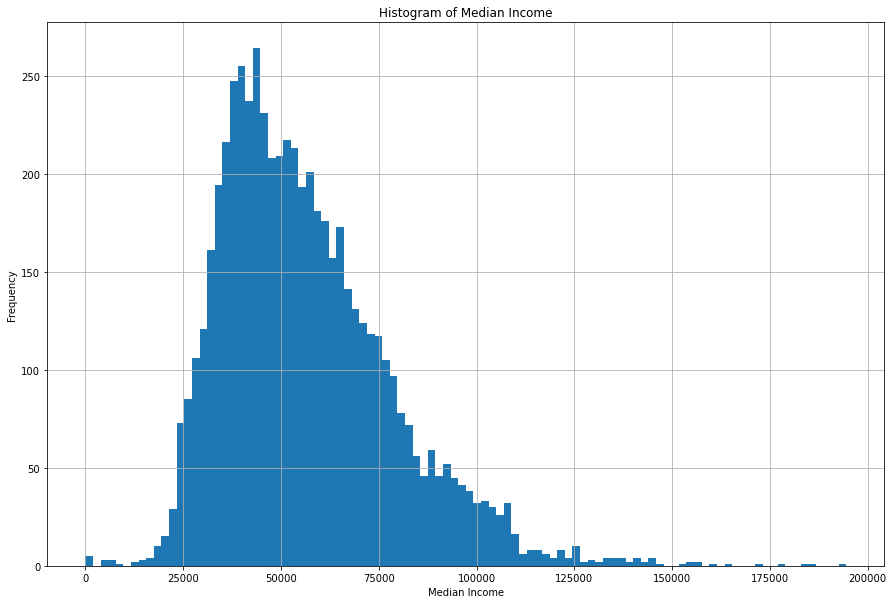

In [4]:
#the distribution of Median Income using histogram
df.hist(column = 'Median Income', bins = 100, figsize = (15,10),grid = True)
plt.xlabel("Median Income")
plt.ylabel("Frequency")
plt.title("Histogram of Median Income")
plt.show()

#Next we are also curious to see if there is huge overlap of Income
#studnets graduated from one year all the way to ten years.
fig = px.parallel_coordinates(df, color="Years After Graduation",
                              dimensions=["Years After Graduation", "Median Income"],
                             color_continuous_scale=px.colors.diverging.Tealrose,
                             color_continuous_midpoint=6,
                             title = "Parallel Coordinates Plot for Median Income" +
                              " by Years of Graduation")
fig.show()

#Another standard way to display the data distribution is violin plot, 
#which can convey the five-number summary:
#minimum, first quartile (Q1), median, third quartile (Q3), and maximum. 
fig = go.Figure(data=go.Violin(y=df['Median Income'], x=df.index.get_level_values(level = 0),
                               box_visible=True, line_color='black',
                               meanline_visible=True, fillcolor='lightseagreen', opacity=0.6))
fig.update_layout(title = "Violin Plot for Median Income by Year of Graduation",
                  xaxis_title="Years after Graduation")
# show all points
fig.update_traces(points='all', jitter=0.05)
fig.show()

#The following scatter plot with OLS line is used.
fig = px.scatter(df, x = "Years After Graduation", y = "Median Income", 
           color = "Credential",trendline="ols")
fig.update_layout(title = "Scatter plot for Median Income by Years of Graduation" +
                  " with regression line")
fig.show()

# <a name='Question2'> Question 2: The impact of "Credential" on "Median Income" on average

Next, we want to group the "Median Income" by different "Credential".  
The reason we want to do this is to know what is **the impact of "Credential" on "Median Income" on average**.  
We are making assumptions that the higher education you have, the higher salary you will get.

Result: Both line and bar plot demonstrate some similar points:
 - Higher education in general corresponds to higher income, except for Doctoral Degree. It is not to say that Doctoral Degree is not worthwhile. We have known that way less people would end up in Doctoral degrees because of lengthy time and more devoted efforts compared to other credential levels. The data points then can be skewed and not representative. Another reason could be that people go to Doctoral degree tend to stay in academia, which often takes a little longer for them to catch up in terms of salary. However, they probably will end up with a much higher salary in the long run. For instance, we do see much higher income for graduates with Doctoral Degree after 10 years of graduation, indicating the income ceiling for Doctoral Degree is probably much higher.
 - Phenomenally, we see a spike in income increase from Bachelor's degree + certificate/diploma to Master's degree, which can be an inspiring message for anyone who wants to pursue a higher degree but also don't want to do pure research end like Doctoral degree.
 - It is not surprising to see that work experience matters. The longer you have been in that field, the higher you will get paid. This is almost ubiquitous for all levels of credential, which is shown in the scatter plot with regression line.

    

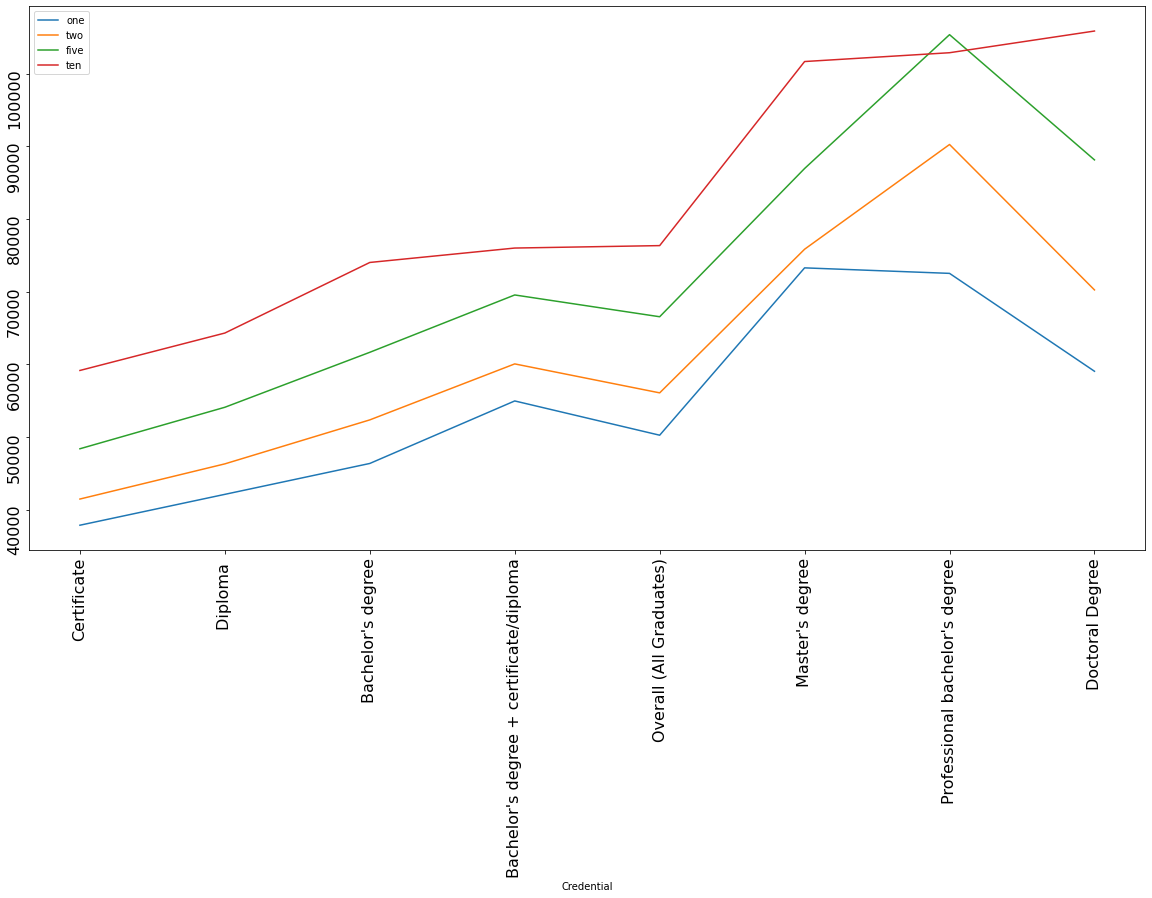

In [5]:
#We will separate different "Years After Graduation", as an indicator for working experience
df_list = []
key_name = list(set([x for x, _ in np.array(df.index)]))

#For each Credential, calculate the mean value for "Median Income"
'''
Reference [10]
'''
for key in key_name:
    df_list.append(df.loc[key].groupby("Credential")['Median Income'].mean())
#combine lists into one dataframe by column
df_key_mean = pd.concat(df_list, axis = 1)
df_key_mean.columns = key_name

#another way to Plot average of "Median Income" vs. "Credential" by "Years After Graduation", 
#using stacked lines
df_key_mean = df_key_mean.sort_values(by = "ten")[["one", "two", "five", "ten"]]
df_key_mean.plot(figsize = (20, 10))
plt.xticks(rotation=90,fontsize=16)
plt.yticks(rotation=90,fontsize=16)
plt.show()

# <a name='Question3'> Question 3: People's desire to pursue higher education over years

We are also interested in investigating how the number of people pursuing higher education has changed over the years for various fields of study as we theorize that we would expect to see a greater number of people pursuing higher levels of education as we approach the present day since from [Question 2](#Question2) showing an increase in Income with higher education.

1. In the "Field of Study (CIP code)" column, we will only look at the "00. Total (All Graduates)", because this is already a summary for each year.  
2. And because when "Years After Graduation" = 1.0 includes all the calendar years in which an individual becomes a graduate in "Graduating Cohort", we will just slice "one" year out for this analysis.

Result: Overall we can see graduates holding Bachelor's degree are the majority based on Alberta's publicly funded post-secondary institutions between 2005 and 2014, followed by Diploma>Certificate>Master's degree>Bachelor's degree + certificate/diploma>Professional bachelor's degree=Doctoral Degree. We do see some rising interest for certain credential in pursuing higher education over years, especially in Bachelor's degree + certificate/diploma and Diploma. Moreover, there is a good chance that Bachelor's degree + certificate/diploma will exceed Master's degree at some point in the near future. This is not too much surprising to see because normally people would focus more on one particular area when they get employed, which over years requires them to gain some certification. And a Master's degree or Doctoral degree are often seen as over qualification for a lot of jobs.

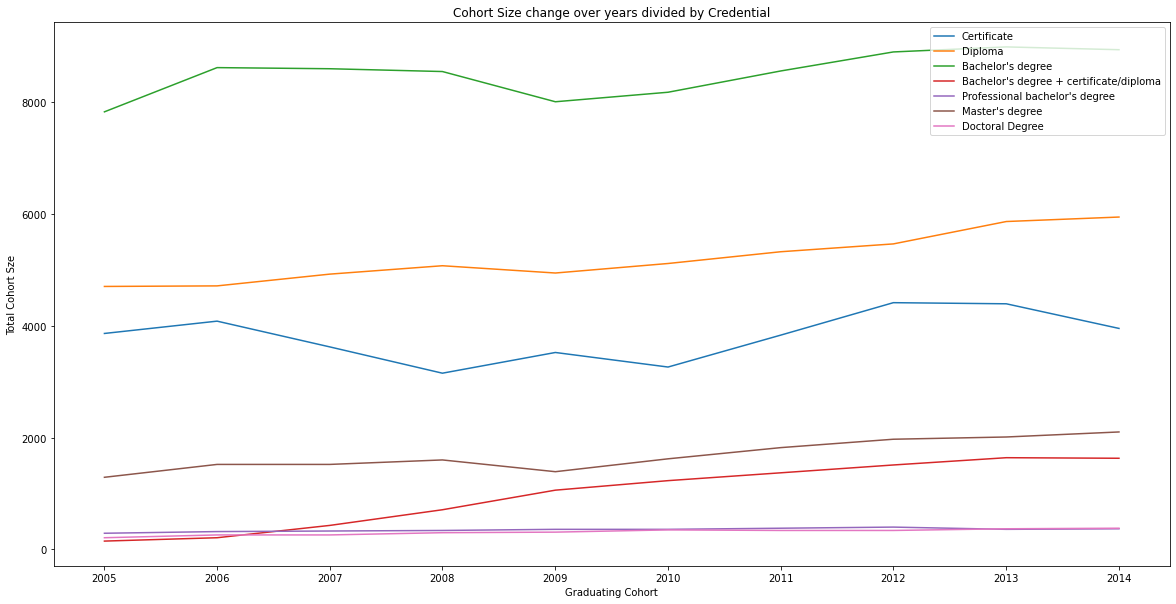

In [6]:
#Only look at the sub-dataset that has the summary information 
#in 'Field of Study (CIP code)' column
df_field_total = df[df['Field of Study (CIP code)'].str.contains("total",case = False)]
#we will just slice out "one" year index, followed by groupby "Credential" 
#for plotting purpose
df_field_total_one_group = df_field_total.loc['one'].groupby(["Credential"],sort=False)

'''
Reference [9]
'''

fig, axes = plt.subplots(figsize=(20,10))
for name, group in df_field_total_one_group:
    axes.plot(group['Graduating Cohort'], group['Cohort Size'],label=f'{name}')
axes.set_xlabel('Graduating Cohort')  # Add an x-label to the axes.
axes.set_ylabel('Total Cohort Sze')  # Add a y-label to the axes.
# Add a title to the axes.
axes.set_title("Cohort Size change over years divided by Credential")  
axes.legend(loc = "upper right");  # Add a legend.

## 3.1: Changes in cohort sizes for fields of interest with respect to the highest and lowest median incomes

We would like to investigate how the number of people pursuing fields of study with the highest and lowest median incomes has changed over the years. We are expecting to see an increase in the fields of study that have the highest median income and a decrease in the fields of study  that have the lowest median income. We will use the information gathered from the analysis in Section 4.1 to identify the top and bottom median income fields/professions and look at how the cohort sizes for these fields have changed over time.

Result: The overall trend for various fields of study both on the higher end and lower end of median incomes did not appear to show any real change in the number of people pursuing these fields over time. This is a bit surprising to us and would lead us to beleive that expected income may be an important factor to consider when choosing a career. A possible explanation for this is that, though income is an important factor when choosing a career, it may not be an important factor to others. Some may value other things such as time at home, being your own boss, interest or passion over financial compensation. Lastly, not everyone has the ability to achieve certain careers.


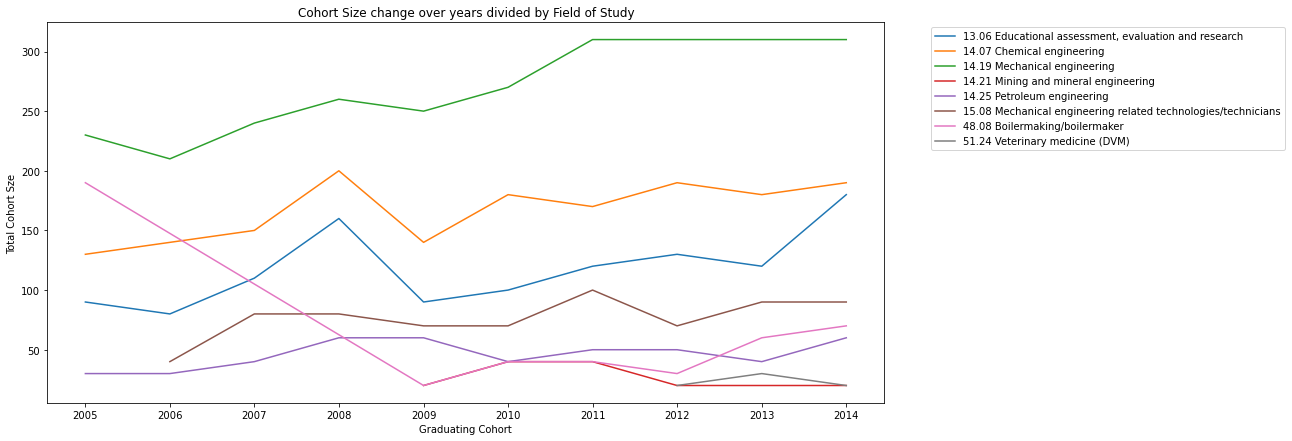

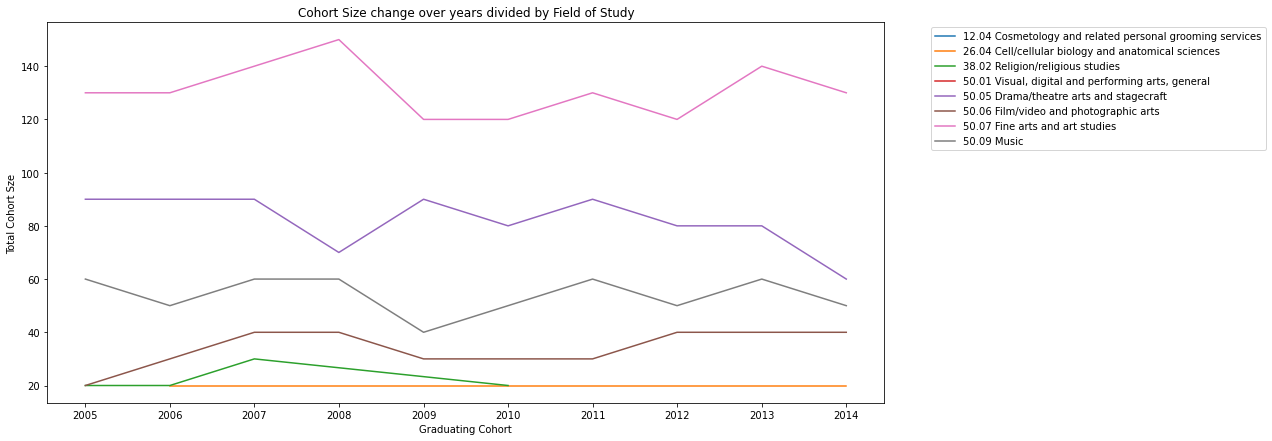

In [7]:
#Only look at the sub-dataset for a sample of the higher median income fields 
df_high_earners = df[df['Field of Study (CIP code)'].str.contains("Petroleum engineering|Boilermaking/boilermaker|Veterinary medicine|Mining and mineral engineering|Mechanical engineering|Chemical engineering|Educational assessment, evaluation and research",case = False)]
df_high_earners_one_group = df_high_earners.loc['one'].groupby(["Field of Study (CIP code)"],sort=False)

fig, axes = plt.subplots(figsize=(15,7))
for name, group in df_high_earners_one_group:
    axes.plot(group['Graduating Cohort'], group['Cohort Size'],label=f'{name}')
axes.set_xlabel('Graduating Cohort')  # Add an x-label to the axes.
axes.set_ylabel('Total Cohort Sze')  # Add a y-label to the axes.
# Add a title to the axes.
axes.set_title("Cohort Size change over years divided by Field of Study")  
axes.legend(bbox_to_anchor=(1.05, 1))  # Add a legend.


df_low_earners = df[df['Field of Study (CIP code)'].str.contains("Cosmetology|Visual, digita|Cell/cellular|Drama|Music|Teacher assistants|Fine arts|Film/video|Religion",case = False)]
df_low_earners_one_group = df_low_earners.loc['one'].groupby(["Field of Study (CIP code)"],sort=False)

fig, axes = plt.subplots(figsize=(15,7))

for name, group in df_low_earners_one_group:
    
    axes.plot(group['Graduating Cohort'], group['Cohort Size'],label=f'{name}')

axes.set_xlabel('Graduating Cohort')  # Add an x-label to the axes.
axes.set_ylabel('Total Cohort Sze')  # Add a y-label to the axes.
# Add a title to the axes.
axes.set_title("Cohort Size change over years divided by Field of Study")  
axes.legend(bbox_to_anchor=(1.05, 1)) # Add a legend.
plt.show()

# Question 4: Field of Study earns the most
As the initial effort, we will combine all levels of credential together and then look at the overall average Median Income.

Second, because graduates holding bachelor's degrees have the majority number over other counterparts, we will then just look at Bachelor's degree holders to investigate which fields of study make the most. By diving into a more specific credential level would provide us with more useful information to the majority of the audience.
## 4.1: Mean Earnings of All Graduates by Field of Study
Result: On average, graduates from Alberta's publicly funded post-secondary institutions between 2005 and 2014 are seen a steady increase based on their working year of experience, regardless of their initial education level and field of study. Among them, "Boilermaking/boilermaker", "Pharmacy" and "Stationary energy sources installer and operator" make the top 3 fields of study in terms of average earnings after one year of graduation. Particularly out of these 20 programs, half of them are in engineering particularly in the energy sector. As for Alberta, its oil sands has the fourth-largest oil reserves in the world, after Venezuela, Saudi Arabia and Iran. It has been years that Alberta's economy heavily relies on energy. Right seen a steep oil crash in 2008, natural resources prices slowly climbed up in 2010, which may be the reason for high income coming from engineering or geology. However, students should be mindful in the future in terms of their career choice because around the world there is a shifting from natural resource to clean energy. Alberta was hit hard since 2015 after the world oil prices have significantly declined [12].

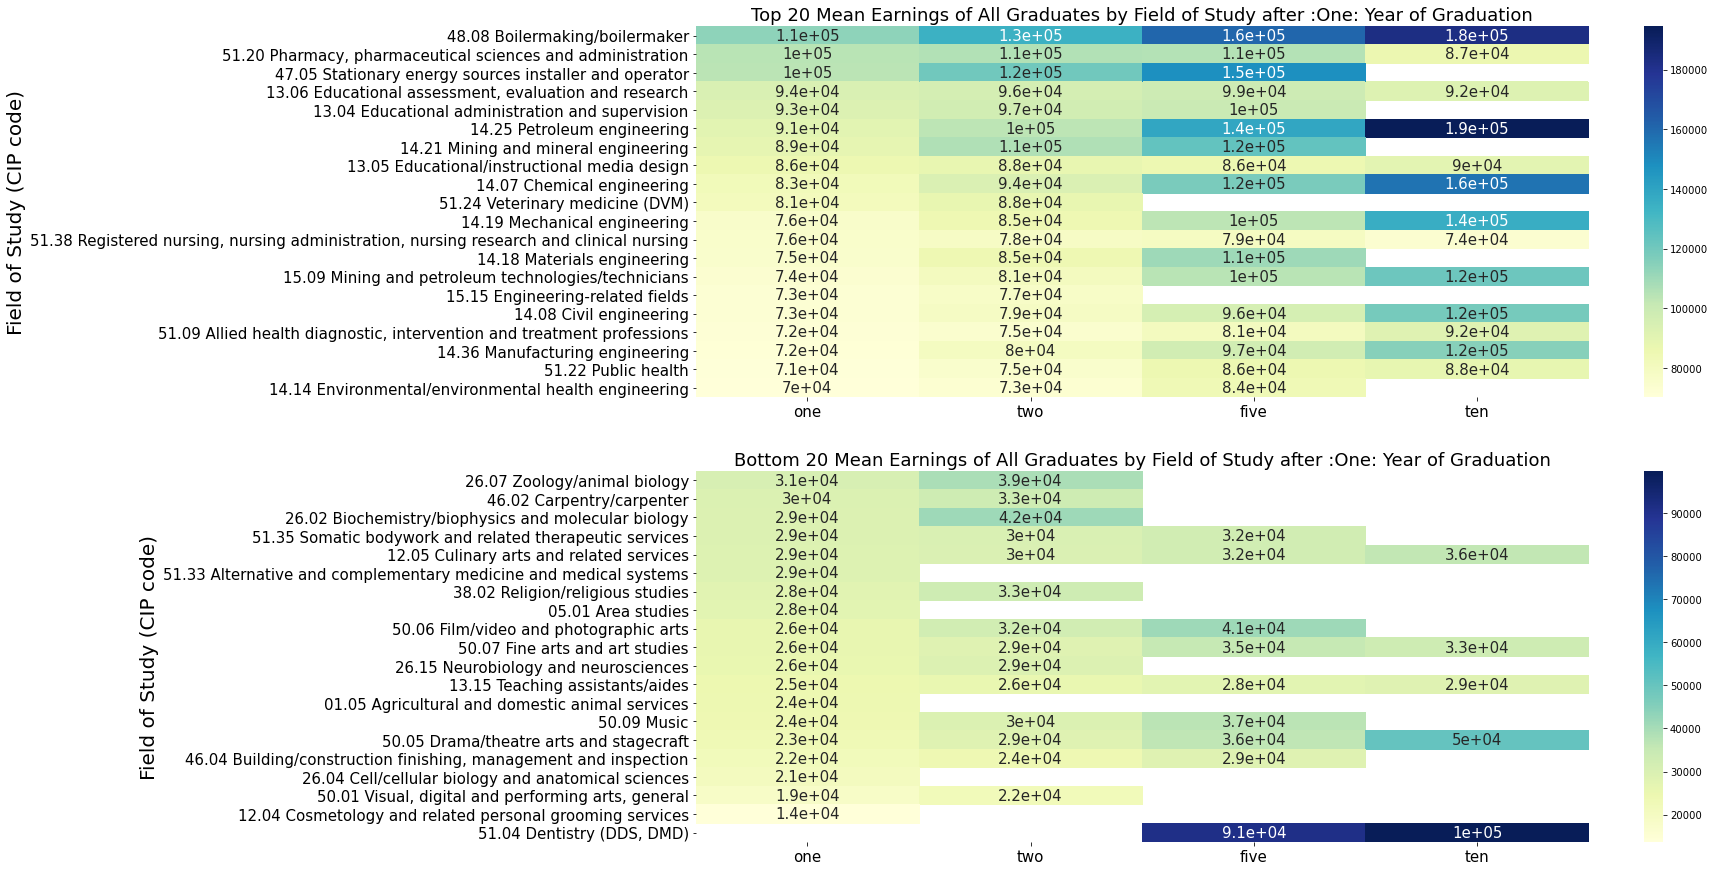

In [8]:
#Look at the overall averge Median Income by different fields
df_overall_cred = df[df.Credential == 'Overall (All Graduates)']
#we will group the dataframe by "Field of Study (CIP code)" and "Years After Graduation"
df_overall_cred_group = df_overall_cred.groupby(
    [pd.Grouper(level=0),'Field of Study (CIP code)']).mean()['Median Income']
#unstack the index of year after graduation using unstack()
df_overall_cred_group_unstack = df_overall_cred_group.unstack(0)[["one", "two", "five", "ten"]]
#we will use heatmap to plot "Field of Study (CIP code)" Vs. "Years After Graduation"
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 15))
'''
Reference [10]
'''
sns.heatmap(df_overall_cred_group_unstack.sort_values(by = "one", ascending = False)[0:20], 
            annot=True,cmap="YlGnBu", ax = ax1,annot_kws={"fontsize":15})
sns.heatmap(df_overall_cred_group_unstack.sort_values(by = "one", ascending = False)[-20:], 
            annot=True,cmap="YlGnBu", ax = ax2,annot_kws={"fontsize":15})
ax1.tick_params(axis='both', which='major', labelsize=15)
ax2.tick_params(axis='both', which='major', labelsize=15)
ax1.set_title("Top 20 Mean Earnings of All Graduates by Field of Study after " +
              ":One: Year of Graduation",fontsize=18)
ax2.set_title("Bottom 20 Mean Earnings of All Graduates by Field of Study after "+
              ":One: Year of Graduation",fontsize=18)
ax1.set_ylabel("Field of Study (CIP code)", fontsize=20)
ax2.set_ylabel("Field of Study (CIP code)", fontsize=20)
plt.show()

## <a name='Question4.2'> 4.2: Mean Earnings of Bachelor's Degree Holders by Field of Study

As shown in [Question 3](#Question3), the Bachelor's Degree holders make up a great portion of the total cohort size in all years. As such, they can be a good representative for mean earnings divided by different fields of study by removing some data noise.

Result: Although there is less fields of study available for Bachelor's Degree, it is probably more relevant for a lot of students because bachelor's degree is often an entry point for them to get into a specific life-long career. Of course, people may and can change their specialization later on, like obtaining an extra professional degree, but it poses some obstacles. We are hoping to provide accurate and tangible informtion before a student enters a college. 
As you can see, it is still trending that longer working experience means higher pay, but now the top 5 or top 10 fields of study become more diversified in terms of average earnings after one year of graduation. Engineering is still hot, but fields like the Health profession, Computer science label their position as well.

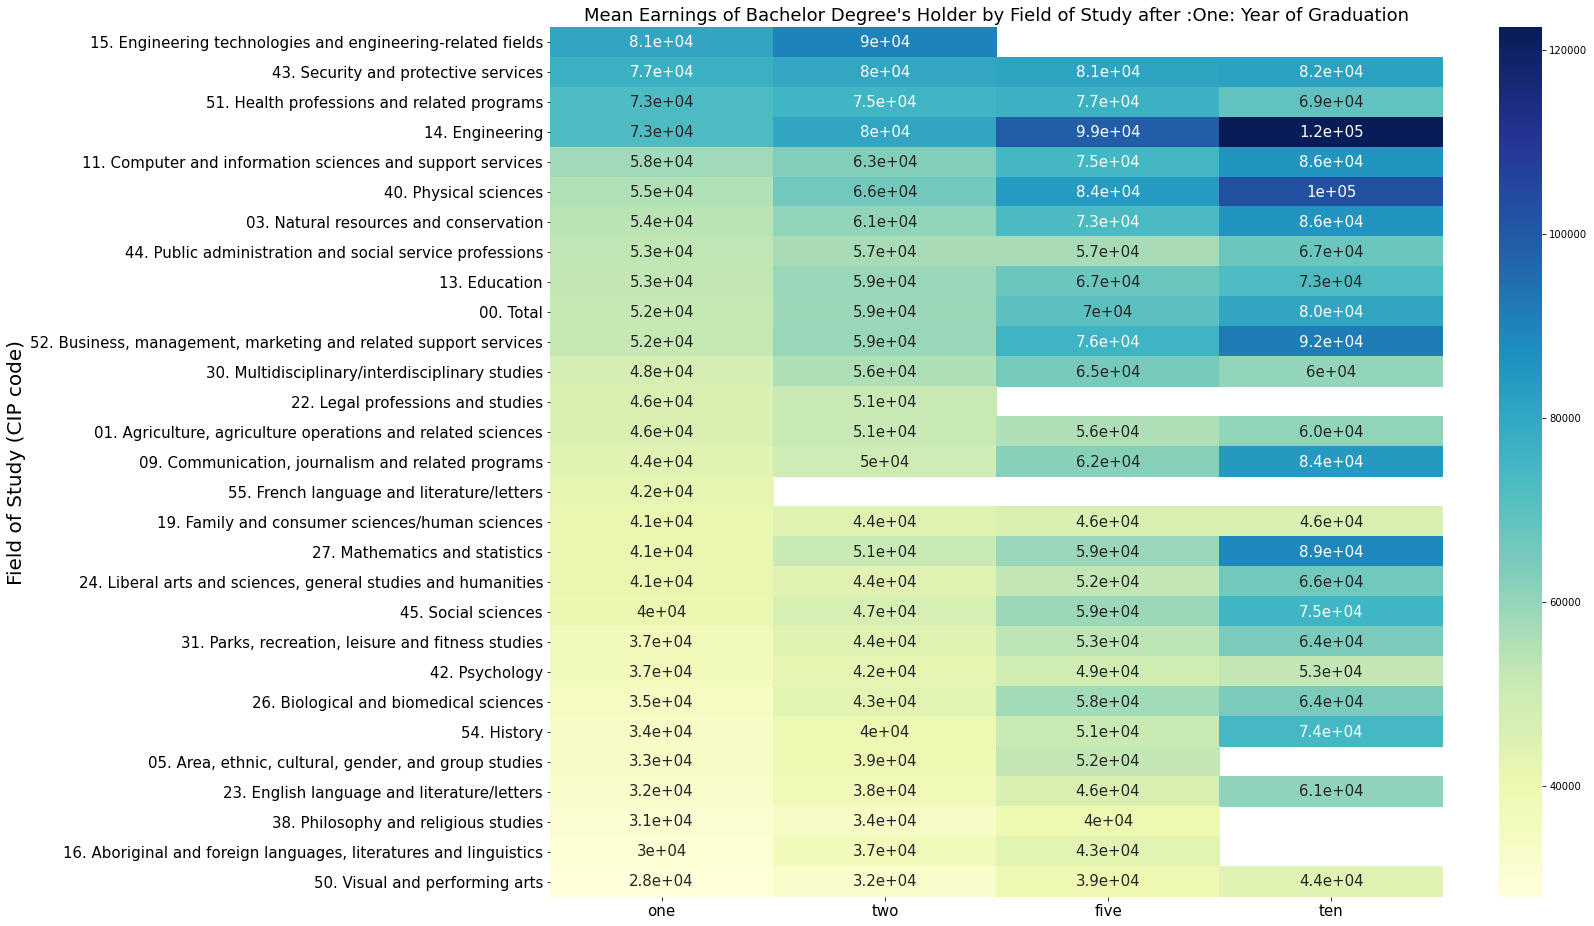

In [9]:
#Look at the averge Median Income by different fields for Bachelor's Degree holders only.
df_bachelor = df[df.Credential == "Bachelor's degree"]
#we will group the dataframe by "Field of Study (CIP code)" and "Years After Graduation"
df_bachelor_group = df_bachelor.groupby(
    [pd.Grouper(level=0),'Field of Study (CIP code)']).mean()['Median Income']
#unstack the index of year after graduation using unstack()
df_bachelor_group_unstack = df_bachelor_group.unstack(0)[["one", "two", "five", "ten"]]
#we will use heatmap to plot "Field of Study (CIP code)" Vs. "Years After Graduation"
fig, axes = plt.subplots(figsize=(20, 16))
sns.heatmap(df_bachelor_group_unstack.sort_values(by = "one", ascending = False), 
            annot=True,cmap="YlGnBu", ax = axes,annot_kws={"fontsize":15})
axes.tick_params(axis='both', which='major', labelsize=15)
axes.set_title("Mean Earnings of Bachelor Degree's Holder by"
              + " Field of Study after :One: Year of Graduation",fontsize=18)
axes.set_ylabel("Field of Study (CIP code)", fontsize=20)
plt.show()

# 4.3: Add-on question based on discussion board
We received a lot of comments constructive suggestions after we posted our report online. Of course, we are not able to address all of them, but we do find the following one quite interesting. We would like to build another plot to our final report.

The question is:  
"I would be interested to see further into how quickly certain fields of study have their income increase after graduation, to compare one field that may start low but rise quickly, to others that may start high but not increase as much.".
We will build the graph based on [Question 4.2](#Question4.2) since bachelor is the most popular credential level among all education.

Result: without too much surprise, Engineering seems to have the fastest growth rate. And it is worth mentioning as well that the starting point for Engineering is also high compared to the rest.

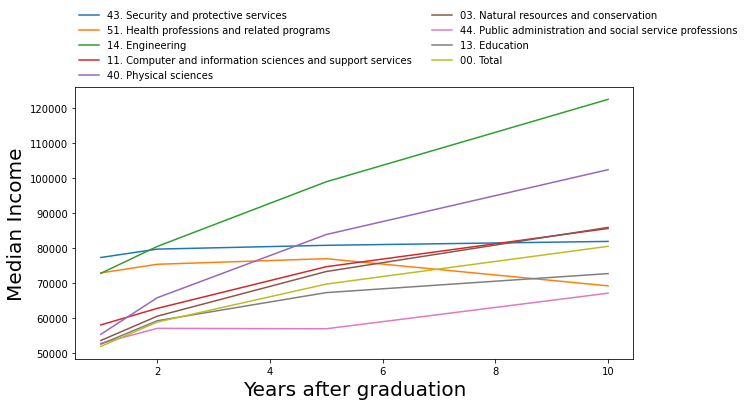

In [10]:
column_name_dict = dict(zip(key_name, [2,5,10,1]))
df_bachelor_group_unstack_num = df_bachelor_group_unstack.copy()
df_bachelor_group_unstack_num.columns = [1,2,5,10]
df_bachelor_group_unstack_num_sort = df_bachelor_group_unstack_num.sort_values(by = 1,
                                          ascending = False)
ax = df_bachelor_group_unstack_num_sort[1:10].transpose().plot()
ax.set_ylabel("Median Income", fontsize=20)
ax.set_xlabel("Years after graduation", fontsize=20)
ax.legend(loc='lower left', bbox_to_anchor= (0.0, 1.01), ncol=2,
            borderaxespad=0, frameon=False)
plt.show()

# <a name='Question5'>  Question 5: Effect of the economy on median income for specific industries.

Here we wanted to investigate whether we could find some evidence to support the relationship between changes in wages or Median Income with respect to real business cycle theory [13]. We theorized that we should observe a lagging, decrease in the Median Income for fields/industries that are experiencing a recession. Economics tells us that the reason we would expect to see a drop in Median Income or wages is because employers will tend to cut operating costs to stay profitable. A large portion of a company’s operating cost is labor. Employees are laid off or given wage reductions and the higher incomed employees whose positions are redundant or can be easily absorbed by others are usually targeted. Laying off employees or reducing an employee’s wage or Median Income is typically one of the last measures a company will take, hence changes in Median Income will "lag" changes in the economy. It is for this reason we expect to see lagging decrease in the Median Income following a recession. Business cycle theory also tells us that we would expect to see the opposite effect during an expansionary period. Here employers compete with one another to attract and keep talent in order to fill the labor shortages to meet growing demands in production; this results in an increase in the Median Income of workers.

Result: Here we read in a secondary data set [15] we also obtained from the Open Data portal of the Alberta Government. We did some data wrangling and looked at the years of interest with respect to our primary data set. We also decided to look at an industry that was especially volatile with the hope that the changes would be more evident with respect to Median Income. Seeing how Alberta's largest industry [14] also tends to be an extremely volatile one we decided to examine the changes in Median Income with respect to Petroleum Engineering and Mining and Petroleum technicians from our primary data set. The resulting changes and patterns in Median Income with respect to the changes in the economy, as measured by GDP, appear to support the real business cycle theory to a certain extent. 

We see that the Median Income decreased for Mining and Petroleum Technicians whereas the Petroleum Engineers median income appeared to be relatively consistent during the time periods that followed a recession between the years 2006-2009. This might be explained by the fact that employers many times will give additional responsibilities/roles to those who are most capable or qualified in order to let less capable or qualified workers go. The rationale behind these actions is that it is challenging to find or high back a more qualified person than a less qualified person. Likewise, we can see a lagging, increase in Median Income for both the Petroleum Engineering and Mining and Petroleum technicians during the expansion of the oil and gas industry from 2009-2014.

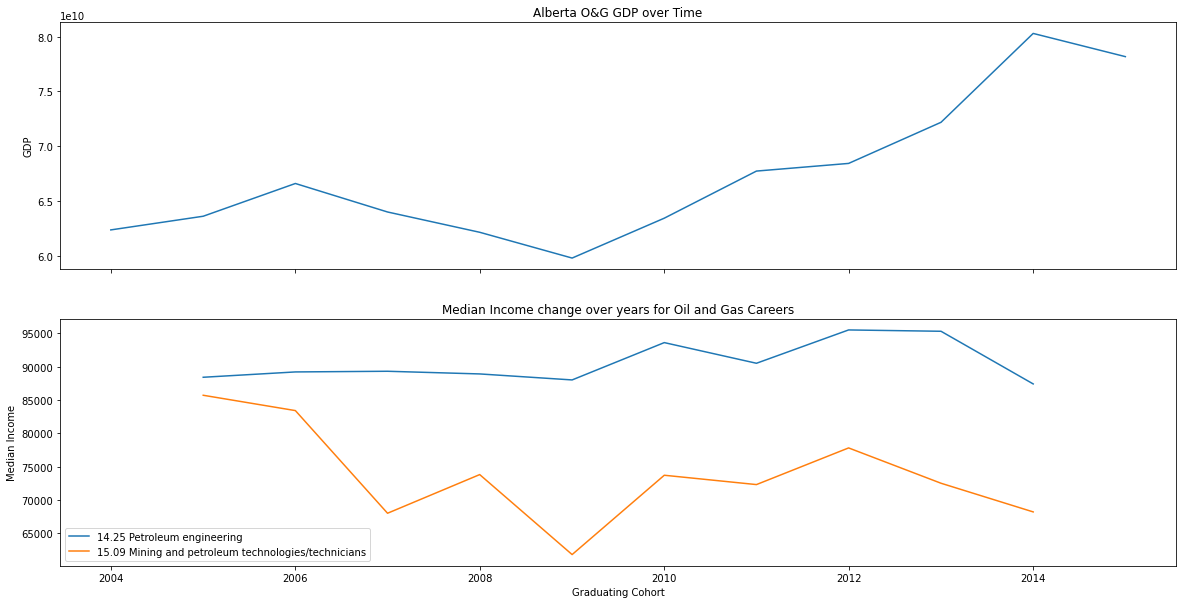

In [11]:
#Reading in our GDP dataset
GDP_df = pd.read_csv("GDP.csv") 

#Changing the Column name from 'When' to 'Date' for clarity purposes
GDP_df.rename({'When':'Date'}, axis=1, inplace=True)

#Converting the 'Date' to a date_time data type
GDP_df['Date'] = pd.to_datetime(GDP_df['Date'], format = '%d-%m-%Y %I:%M:%S %p')

#Creating a subset of data with the columns of interest
GDP_df_AB = GDP_df[["Date","Industries","Alberta"]]

#Looking only at oil and gas industry
GDP_df_AB_oil = GDP_df_AB[GDP_df_AB['Industries'].str.contains("oil",case = False)]

#Looking at the dates from 2004-2015
GDP_df_AB_oil = GDP_df_AB_oil[(GDP_df_AB_oil['Date']>'2003') & (GDP_df_AB['Date']<'2016')]

xAxis = GDP_df_AB_oil['Date']
yAxis = GDP_df_AB_oil['Alberta']

fig, axes = plt.subplots(2,1,figsize=(20,10),sharex=True)
axes[0].plot(xAxis,yAxis)
axes[0].set_title('Alberta O&G GDP over Time')
axes[0].set_ylabel('GDP')

df_field_total = df[df['Field of Study (CIP code)'].str.contains("Petroleum",case = False)]
df_field_total_one_group = df_field_total.loc['one'].groupby(["Field of Study (CIP code)"],sort=False)

for name, group in df_field_total_one_group:
    axes[1].plot(group['Graduating Cohort'], group['Median Income'],label=f'{name}')
axes[1].set_xlabel('Graduating Cohort')  # Add an x-label to the axes.
axes[1].set_ylabel('Median Income')  # Add a y-label to the axes.
# Add a title to the axes.
axes[1].set_title("Median Income change over years for Oil and Gas Careers")  
axes[1].legend(loc = 'lower left');  # Add a legend.
plt.show()


## 5.1: Effect of the economy on cohort size for specific industries

For the same reasons mentioned in [Question 5](#Question5) we chose to study the changes in the Cohort Size for oil and gas related Field of Study with hopes that changes here would be more evident due to the highly cyclical nature of the industry. We theorize that the length of a recession/expansion will be a key factor towards whether we see a decrease in a cohort size for a field of studying in oil and gas, we feel that the 2006-2009 recession and 2009-2014 expansion will be long enough to give us some evidence of what we expect to see. We would expect to see cohorts’ sizes decrease in the years that follow a prolonged recession and we would expect to see cohort sizes increase in the years that followed a prolonged expansion. We would expect most people to be at least somewhat motivated by job prospectus or outlook when deciding in which area or field they will study.

Result: Looking at the cohort sizes over the years we can see that when the oil and gas industry was expanding (2009-2014) there appears to be a lagging increase in the Cohort Sizes and in the years that follow the recession (2006-2009) a subsequent, decrease in the Cohort Sizes for Petroleum Engineering and Mining and Petroleum technicians.

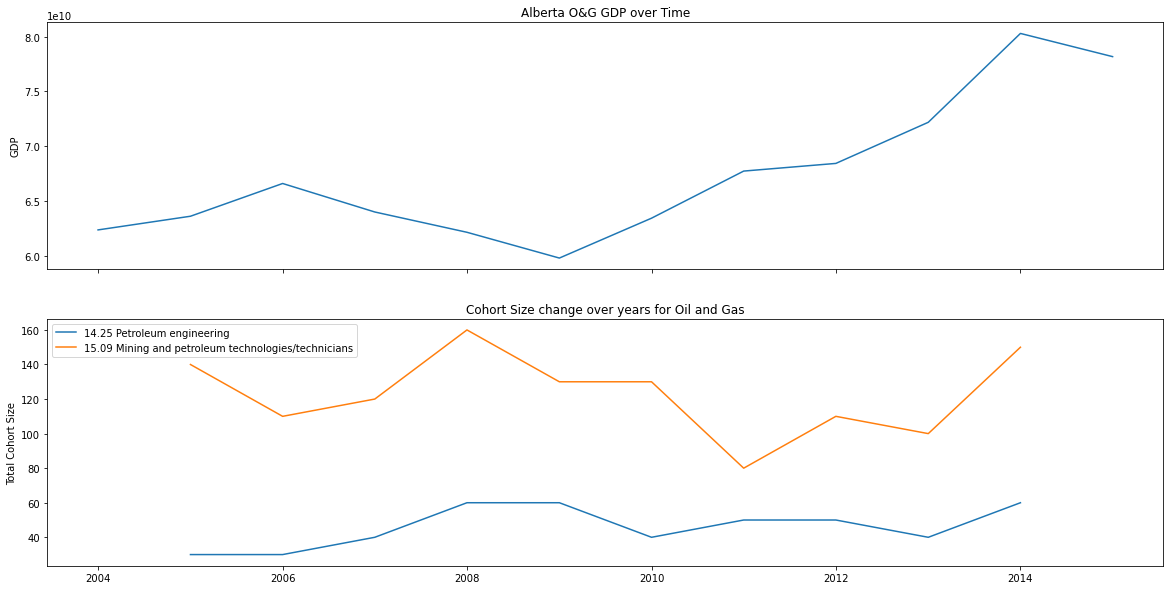

In [12]:
#Reading in our GDP dataset
GDP_df = pd.read_csv("GDP.csv") 

#Changing the Column name from 'When' to 'Date' for clarity purposes
GDP_df.rename({'When':'Date'}, axis=1, inplace=True)

#Converting the 'Date' to a date_time data type
GDP_df['Date'] = pd.to_datetime(GDP_df['Date'], format = '%d-%m-%Y %I:%M:%S %p')

#Creating a subset of data with the columns of interest
GDP_df_AB = GDP_df[["Date","Industries","Alberta"]]

#Looking only at oil and gas industry
GDP_df_AB_oil = GDP_df_AB[GDP_df_AB['Industries'].str.contains("oil",case = False)]

#Looking at the dates from 2004-2015
GDP_df_AB_oil = GDP_df_AB_oil[(GDP_df_AB_oil['Date']>'2003') & (GDP_df_AB['Date']<'2016')]

xAxis = GDP_df_AB_oil['Date']
yAxis = GDP_df_AB_oil['Alberta']

fig, axes = plt.subplots(2,1,figsize=(20,10),sharex=True)
axes[0].plot(xAxis,yAxis)
axes[0].set_title('Alberta O&G GDP over Time')
axes[0].set_ylabel('GDP')


df_field_total = df[df['Field of Study (CIP code)'].str.contains("Petroleum",case = False)]
df_field_total_one_group = df_field_total.loc['one'].groupby(["Field of Study (CIP code)"],
                                                             sort=False)

for name, group in df_field_total_one_group:
    axes[1].plot(group['Graduating Cohort'], group['Cohort Size'],label=f'{name}')
axes[1].set_ylabel('Total Cohort Size')  # Add a y-label to the axes.
# Add a title to the axes.
axes[1].set_title("Cohort Size change over years for Oil and Gas")  
axes[1].legend(loc = 'middle left')  # Add a legend.
plt.show()

# Question 6: Industry interdependency in Alberta

Here we would like to investigate what, if any at all, industries in Alberta go through the same business cycles at the same time. This would be something that would provide valuable insight for someone who is choosing a career to pursue. Understanding how your potential income, job security or opportunities can change with respect to changes in other industries can provide some valuable insight when deciding which industry or career to pursue in your post-secondary studies.

Result: Though this may be somewhat intuitive, we did find evidence of strong correlations between the oil, gas and mining industries and the construction industry. This makes sense in that the energy industry in Alberta is the largest industry and supplies wealth to many of its workers. This wealth is then used to finance many things including the construction of homes, building, oil and gas facilities etc.

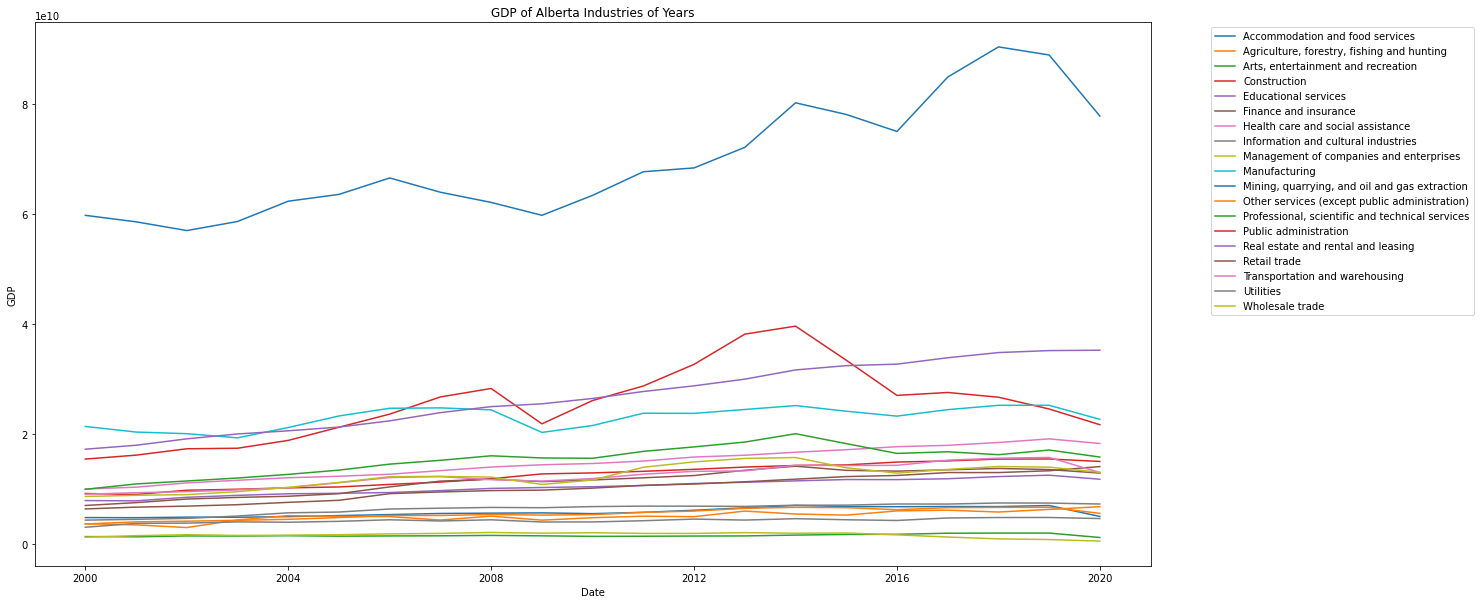

In [13]:
GDP_df_AB = GDP_df[["Date","Industries","Alberta"]]

#Looking at the dates from 2000-2020
GDP_df_AB = GDP_df_AB[(GDP_df_AB['Date']>='2000') & (GDP_df_AB['Date']<='2020')]

#Removing 'Total gross domestic product' and 'All industries'
GDP_df_AB = GDP_df_AB[(GDP_df_AB['Industries'] != "Total gross domestic product") 
                      & (GDP_df_AB['Industries']!= "All industries")
                     & (GDP_df_AB['Industries']!= "Administrative and support, waste management and remediation services")]

GDP_df_AB = GDP_df_AB.groupby(["Industries"],sort=False)

fig, axes = plt.subplots(figsize=(20,10))
for name, group in GDP_df_AB:
    axes.plot(group['Date'], group['Alberta'],label=f'{name}')
axes.set_xlabel('Date')  # Add an x-label to the axes.
axes.set_ylabel('GDP')  # Add a y-label to the axes.
# Add a title to the axes.
axes.set_title("GDP of Alberta Industries of Years")  
#axes.legend(loc = "upper right");  # Add a legend.
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

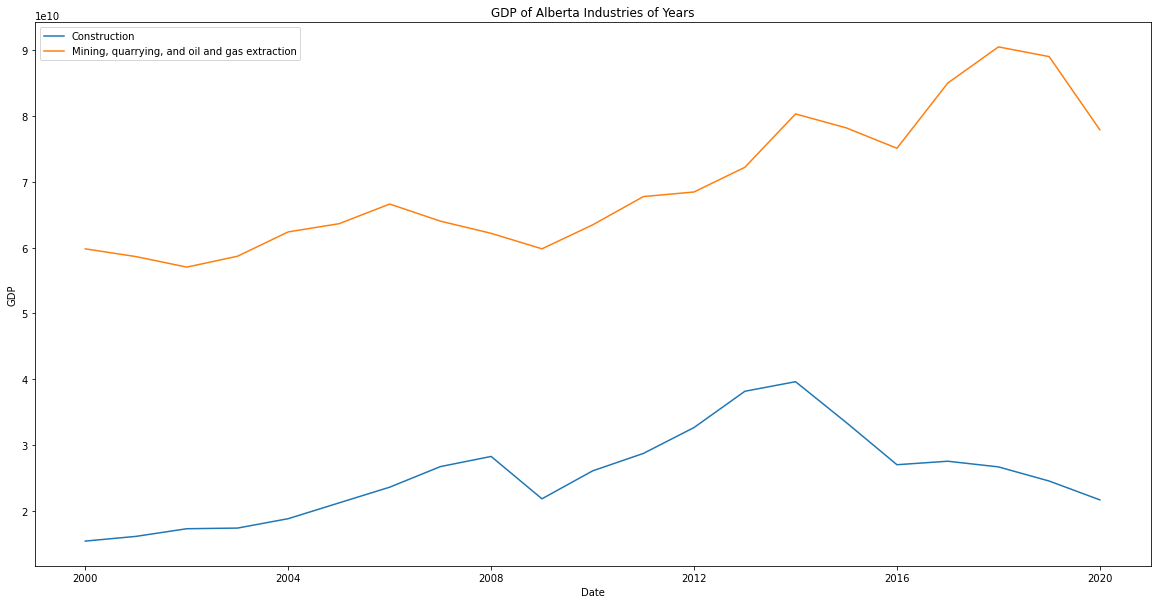

In [14]:
GDP_df_AB = GDP_df[["Date","Industries","Alberta"]]

#Looking at the dates from 2000-2020
GDP_df_AB = GDP_df_AB[(GDP_df_AB['Date']>='2000') & (GDP_df_AB['Date']<='2020')]

#Compare 'Mining, quarrying, and oil and gas extraction' and 'Construction'
GDP_df_AB = GDP_df_AB[(GDP_df_AB['Industries']=='Mining, quarrying, and oil and gas extraction')|(GDP_df_AB['Industries']=='Construction')]

GDP_df_AB = GDP_df_AB.groupby(["Industries"],sort=False)

fig, axes = plt.subplots(figsize=(20,10))
for name, group in GDP_df_AB:
    axes.plot(group['Date'], group['Alberta'],label=f'{name}')
axes.set_xlabel('Date')  # Add an x-label to the axes.
axes.set_ylabel('GDP')  # Add a y-label to the axes.
# Add a title to the axes.
axes.set_title("GDP of Alberta Industries of Years")  
axes.legend(loc = "upper left");  # Add a legend.



# Question 7 : Educational debt incurred with higher education and comparision with level of education

In [Question 2](#Question2) we compared the median income with credentials (level of study) and in [Question 3](#Question3) we compared the cohort size with the median income. Furthermore, it was important to see the other side of the coin. In order to gain such education, students take loans from governmental and non-governmental sources.Them the question arises for How is this debt related to potential income that the student will gain after employment?  

For this, the dataset used was from Statistics Canada, "Student debt of postsecondary graduates from all sources, by province of study, level of study, field of study and sex"[19]. The data was collected by National Graduate Survey and was released on 2020-12-14. It was modified on 2022-02-19. This was then wrangled and merged with the main data set [14].

Results:<br>
We decided to put an average to the median value of debt for all levels of study. It is important to note that the dataframe for median income had 8 categories, while the debt has only 6 categories and hence when the data was merged it dropped 2 categories from the median income dataframe (Certificate and Bachelor's + certificate)

It was important to see at the long term (10 years after graduation) and short term (1 year after graduation ) impact of the debt. Hence comparision was done these two year (1 year and 10 year). 
    
After taking a look in to the debt and plotting it along with the median income we see some trends in the level of education vs. debt vs. median income. As the level of education increases, so thus the income and debt. There is however an exception, the professional bachelor's degree, where the income is almost same as the debt. In [Question 2](#Question2) we found that for all levels of study, the professional bachelor's degree has the highest median income, as it showed some peaks. There is a small catch to it, the debt incurred is high. 
    
So, what exactly is this professional bachelor's degree? Well, according to Statistics Canada, A professional degree is a degree that lead to entry-to-practice professions. Some of these degrees are Doctor of Dental Surgery (DDS), Bachelor of Law or Juris Doctor (LLB, JD, BCL), Doctor of Medicine (MD), Doctor of Optometry (OD), Pharmacy (PharmD, BS, BSc, BPharm), and Doctor of Veterinary Medicine (DVM). These professions that incurr a lot of expenses and they need a lot of practice before being financially sucessful. These finding agree to the research done by researchers at Statastic Canada [12].

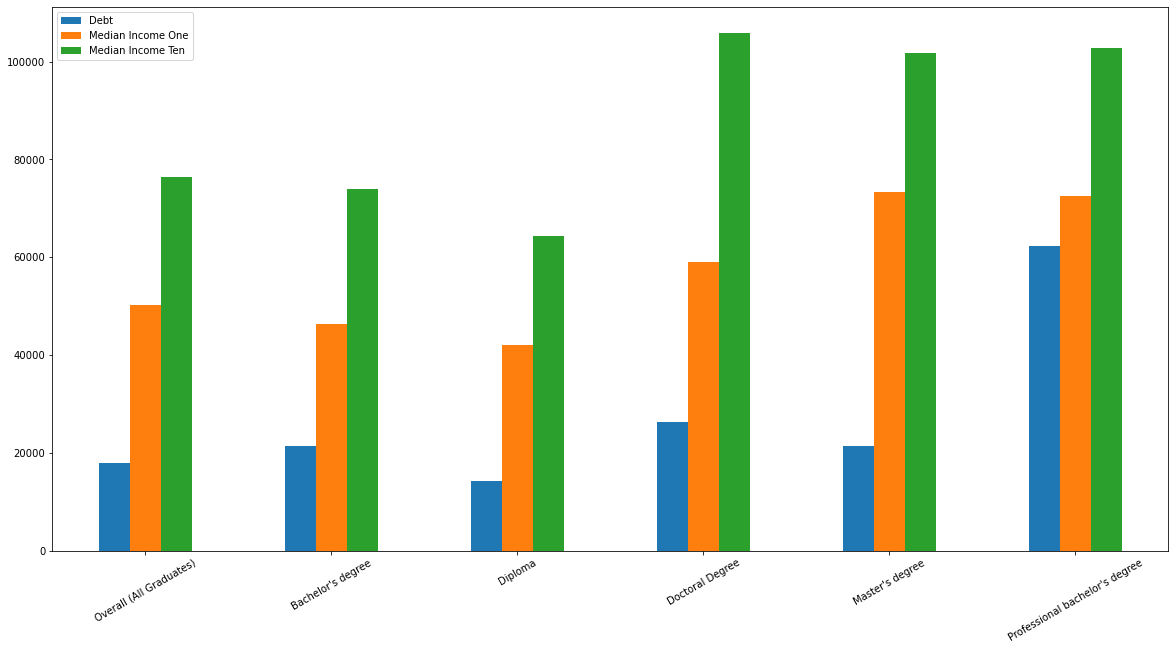

In [15]:
df_debt = pd.read_csv("Student_Debt.csv")
# Data Wrangling

df_debt = df_debt[(df_debt['GEO'] == 'Alberta') & (df_debt['UOM']=='Dollars') & 
                  (df_debt['Statistics']=='Median debt owed to the source at graduation')]

# drop Unneccessary columns
df_debt = df_debt[['GEO','Level of study', 'Field of study','Sex','Type of debt source', 'Statistics','UOM','VALUE']] 

df_debt = df_debt.dropna()


#display(df_debt_both)

# Get the average value of debt for all level of study
debt_list = []
debt_list = df_debt.groupby(by=["Level of study"])["VALUE"].mean()
df_debt_Mean = debt_list.to_frame()
df_debt_Mean.columns = ["Debt"]

# Rename elments in the level of study column
df_debt_Mean = df_debt_Mean.rename(index = {"All levels of study":"Overall (All Graduates)", "Bachelor's":"Bachelor's degree","College":"Diploma",
                                           "Doctorate":"Doctoral Degree","Professional":"Professional bachelor's degree", "Master's": "Master's degree"})

# income after one year
df_mean_one = df_key_mean["one"].to_frame()
df_mean_one.columns=["Median Income One"]
df_mean_one.index = df_mean_one.index.str.strip() # remove whitespaces from index

# income after ten year
df_mean_ten = df_key_mean["ten"].to_frame()
df_mean_ten.columns=["Median Income Ten"]
df_mean_ten.index = df_mean_ten.index.str.strip() # remove whitespaces from index

# merge all three together
df_debt_income = pd.merge(pd.merge(df_debt_Mean,df_mean_one,left_index=True, right_index=True),df_mean_ten,left_index=True, right_index=True)

#plot bar chart
df_debt_income.plot.bar(rot=30, figsize = (20,10));

# Question 8 : Student debt in Alberta according to the field of study

In Question 4.0 we found the field of studies that had the highest median income (petroleum engineers followed by security and protective services). It is also important to see the debt incurred by students pursuing these fields. 

Result: The debt incurred by all fields of study is more or less the same with the exception of personal, protective and transportation services. This makes the security and protective services the career of choice. 
In contrast to this, the Visual, performing arts and communication have the same debt as other fields, however the income trend is not as promising as other field. It is important to note that Health and related fields have the same debt as other fields and the income trend flattened with time. Thus, we can say that dentists may have higher educational debt than other careers with lesser median income. 
According to Abdulla M. et al. [17], from 1981 to 2007, the tuition fee for medical education (across Canada) increased much more than the inflation and is the major contributing factor in the debt at graduation. Similar to Galarneau D and Gibson L.[16], they do not compare it with the possible median income in the years to come. 

And finally, we see that when it comes to median income after graduation vs. student debt. 
<ol>
    <li> The Architecture, engineering, and related technologies have the highest difference between median income and debt</li>
    <li> and Humanities has the lowest difference between median income and debt</li>
</ol>
    

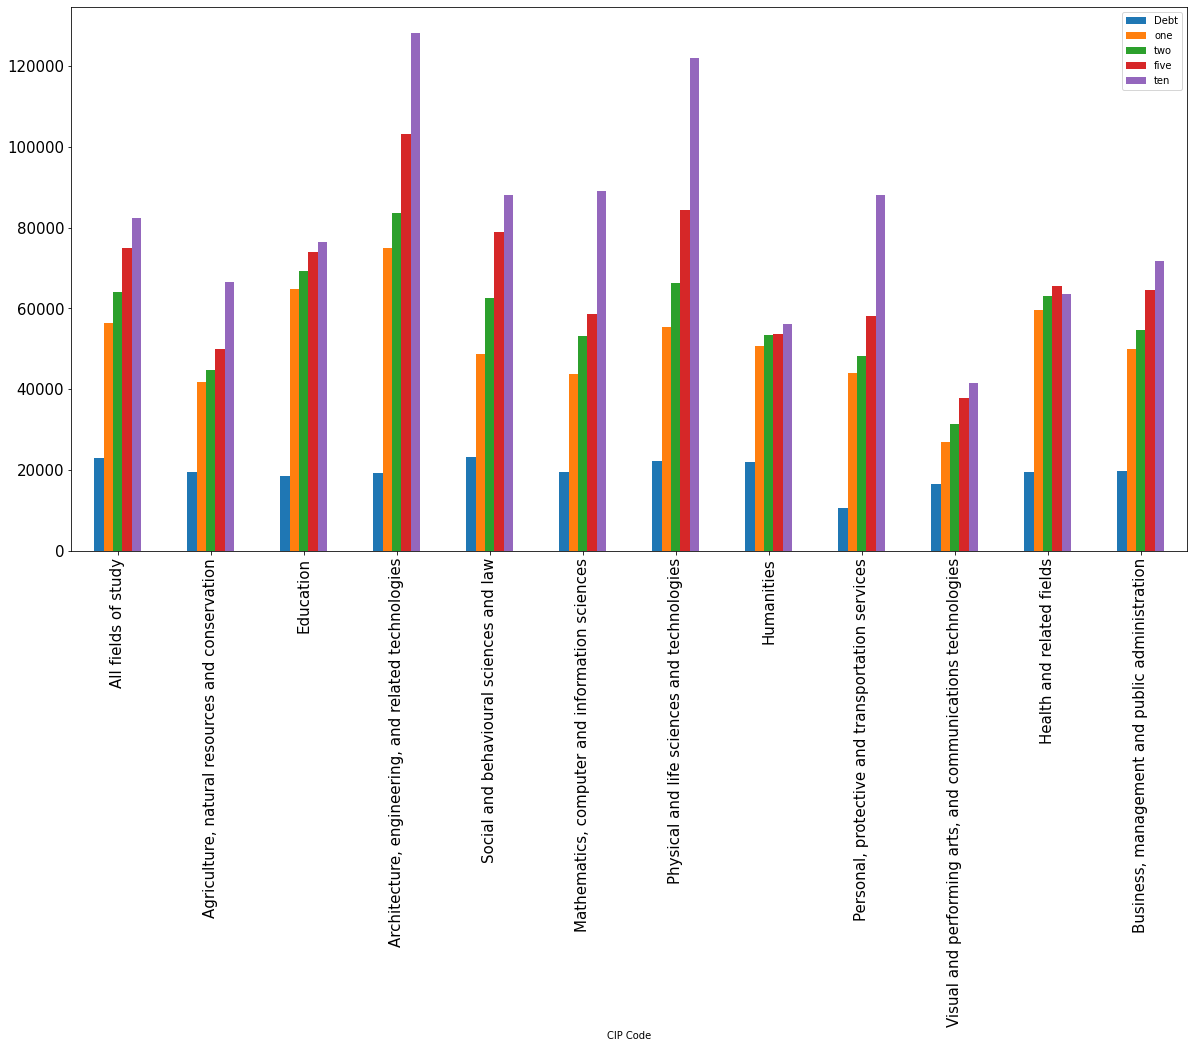

In [16]:
# get CIP code for each field of study
df_CIP = df
df_CIP["CIP Code"] = df["Field of Study (CIP code)"].str.extract('(\d*\.?\d+)')
df_CIP["CIP Code"] = df_CIP["CIP Code"].astype(float)
df_CIP["CIP Code"] = df_CIP["CIP Code"].astype(int)
df.head(5)

# assign correct CIP codes for merging
df_debt.loc[df_debt["Field of study"] == 'All fields of study', "CIP Code" ] = 0
df_debt.loc[df_debt["Field of study"] == "Agriculture, natural resources and conservation [9]", "CIP Code" ] = 1
df_debt.loc[df_debt["Field of study"] == "Architecture, engineering, and related technologies [8]", "CIP Code" ] = 14 
df_debt.loc[df_debt["Field of study"] == "Business, management and public administration [5]", "CIP Code" ] = 52
df_debt.loc[df_debt["Field of study"] =="Education [1]", "CIP Code" ] = 13
df_debt.loc[df_debt["Field of study"] == "Health and related fields [10]", "CIP Code" ] = 51
df_debt.loc[df_debt["Field of study"] == "Humanities [3]", "CIP Code" ] = 44
df_debt.loc[df_debt["Field of study"] == "Mathematics, computer and information sciences [7]", "CIP Code" ] = 27
df_debt.loc[df_debt["Field of study"] == "Personal, protective and transportation services [11]", "CIP Code" ] = 49
df_debt.loc[df_debt["Field of study"] == "Physical and life sciences and technologies [6]", "CIP Code" ] = 40
df_debt.loc[df_debt["Field of study"] == "Social and behavioural sciences and law [4]", "CIP Code" ] = 22
df_debt.loc[df_debt["Field of study"] == "Visual and performing arts, and communications technologies [2]", "CIP Code" ] = 50

# find debt by field of study
debt_list = []
debt_list = df_debt.groupby(by=["CIP Code"])["VALUE"].mean()
df_debt_Mean_field = debt_list.to_frame()
df_debt_Mean_field.columns = ["Debt"]

# median income by field of study
df_list = []
key_name = list(set([x for x, _ in np.array(df.index)]))
#For each Credential, calculate the mean value for "Median Income"
for key in key_name:
    df_list.append(df.loc[key].groupby("CIP Code")['Median Income'].mean())
#combine lists into one dataframe by column
df_field_mean = pd.concat(df_list, axis = 1)
df_field_mean.columns = key_name
df_field_mean = df_field_mean.sort_values(by = "ten")[["one", "two", "five", "ten"]]
# merge the dataset to get results
df_detinc_field = pd.merge(df_debt_Mean_field,df_field_mean, left_index=True,right_index=True)
# rename index to show field
df_detinc_field = df_detinc_field.rename(index = {0:'All fields of study',1:'Agriculture, natural resources and conservation' 
                                                  ,13:'Education',14:'Architecture, engineering, and related technologies'
                                                  ,22:'Social and behavioural sciences and law',27:'Mathematics, computer and information sciences'
                                                  ,40:'Physical and life sciences and technologies',44:'Humanities',
                                                  49:'Personal, protective and transportation services',50:'Visual and performing arts, and communications technologies'
                                                  ,51:'Health and related fields',52: 'Business, management and public administration'})
# bar
ax = df_detinc_field.plot.bar(rot=90, figsize = (20,10))
ax.tick_params(axis='both', which='major', labelsize=15)
plt.show()

# Summary
To summarize, we investigated the influence of `"Field of Study"`, `"Years of Working Experience"`, `"Education Level"`, `"Macro Environment like Economy or Industry"`, and `"Student Debt"` on post-secondary graduate earnings in Alberta.

- The highest and lowest earning fields of study, 

- Higher education in general corresponds to higher income 

- More work experience = more salary. 

- People's desire ("Cohort Size") to pursue higher education is independent of income.  

- Alberta's GDP is heavily influenced by the oil and energy sector, and thus half of the 20 top paying programs are engineering and related fields. 

- Student debt increases with higher education. 

- Architecture, Engineering and related technologies have the highest difference between income and debt while humanities have the lowest difference. 

<h1 align="center"><font size="20"> Thank you for your attention</font></h1>

# Conclusion and Future Direction

## Conclusion
The objective of this study mainly focuses on how Alberta post-secondary graduate earnings within a population are influenced by `"Field of Study"`, `"Years of Working Experience"`, `"Education Level"`, `"Macro Environment like Economy or Industry"`, and `"Student Debt"`. Such disaggregated information is very useful for any potential student facing with making program decisions. 

The overall `"Median Income"` among all graduates has a big range between 25k to 100k. Our initial exploratory analysis indicates that although there is a great overlap for `"Median Income"` among different years of working experience, the upward trending is obvious. On average, the longer working experience in years you have, the higher salary you will get, regardless of other factors. On top of that, `"Education Level"` plays a big role. Within ten years of tracking, higher education in general corresponds to higher income except for Doctoral Degree. One particular note is that a significant spike in income increase is observed for Bachelor's degree + certificate/diploma to Master's degree, which can be an inspiring message for anyone who wants to pursue a higher degree but also doesn't want to do pure research like a Doctoral degree.

To our surprise, people's desire (`"Cohort Size"`) to pursue higher education does not change too much over years given the positive association between education and income. We speculate a few reasons. First, though income is an important factor when choosing a career, it may not be an the most important factor to many. Some may value other things such as time at home, being your own boss, interest or passion over financial compensation. Lastly, not everyone has the ability to achieve certain careers. 

One point worth mentioning is that we do see some rising interest for Bachelor's degree + certificate/diploma and Diploma. This is not too surprising as most people who are in a field/career that requires some sort of technical knowledge or training will continue to require training or development in order to maintain a level of competence to perform their jobs. However, further education such as a Master's degree or Doctoral degree is often seen as over qualification and not deemed as a requirement for many careers.

In terms of `"Field of Study"` between 2005 and 2014, broad engineering fields occupy half of the top 20 programs, particularly in the energy sector. And the lower rankings are more biology- or arts-related jobs. However, future students should be mindful of these results in making decisions, because Alberta's GDP is heavy with oil and energy sector (explained further), which might be different in the near future. Further analysis can be more beneficial since there has been a lot of talk and pressure towards switching to a more “greenhouse gas” friendly energy source, such as renewables.


When it comes to `"Student Debt"`, it was compared to `"Credentials"` (or "Level of study") and `"Field of Study"`. The debt vs credentials were straight forward, that is as the credentials grew from diploma to bachelors to masters to doctorial, the debt and median income increased except for the professional bachelor’s degree. The accumulated debt in the professional degrees appears to be the highest. This can be explained by the competitiveness of the programs such as engineer law, optometry, pharmacy, medicine. These highly competitive degrees come with a premium price tag.

When it came to `"Student Debt"` and `"Field of Study"`, two interesting observations were noted. Firstly, for the “Humanities” field of study, we saw similar levels of debt to the other fields, but the income was comparatively low and consistent over a long period of time. This pattern was also seen in the “Health and related fields”. Secondly, the highest difference in debt and median income over 1 year to 10 years was in “Architecture, Engineering and related technologies.”  This would lead us to believe that this field of study  would yield the highest rate of return on post-secondary studies is in fact “Architecture, Engineering and related technologies.” The remaining fields we would expect to have all very similar rates of return.


## Future Direction

Although we were able to arrive at some results that were expected, we recognize that our data set is over a very finite time period (10 years). It would be interesting to investigate these questions over a larger period of time as this data was most likely skewed by a certain factor during this period. For example, Alberta’s oil and gas economy was growing at a considerable rate from 2009-2014, this time period accounts for a large portion of our data set. We would like to continue our analysis to the present day and even look to analyze pre-2005 data in order to reaffirm some of the results we saw. We also need to understand that any time period we analyze would almost most certainly be affected by some larger events ex.) COVID 19 Pandemic, the financial crisis etc. We need to be cognizant of these sorts of events and attempt to normalize or ensure we are comparing "apples" to "apples" so to speak when we are answering some of our questions.

Our data is also geographically isolated to Alberta, it would be very interesting to look at the data of other provinces and compare Alberta with them and even Canada as a whole. We saw how engineering was one of the highest paid, specifically Petroleum Engineering, `"Field of Study"` in Alberta due to the abundance of natural resources and development here. We would not expect this to hold true in many other provinces. We would also be interested in gathering more information using clustering techniques to see the `"Field of Study"` that are similar.

Another important study that can be done is to study the unemployment by field of study. This will give future students an idea into how the employment market is and give an insight to student on which fields have employment that is not affected by the global or regional economic condition.

# References


[1]. Overview. (n.d.). [Text/HTML]. World Bank. Retrieved February 19, 2022, https://www.worldbank.org/en/topic/education/overview

[2]. Alberta post-secondary graduate earnings by field of study—Open government. (n.d.). Retrieved February 19, 2022, from https://open.alberta.ca/opendata/alberta-post-secondary-graduate-earnings-by-field-of-study

[3]. Government of Canada, S. C. (2010, September 20). Classification of instructional programs (Cip) canada 2011. https://www.statcan.gc.ca/en/subjects/standard/cip/2011/index

[4]. Pandas Core Group, "pandas.concat" *Pandas API Reference*, accesssed February 10, 2022. https://pandas.pydata.org/docs/reference/api/pandas.concat.html  

[5]. Yongpeng Fu, "DATA601 Assignment 1", accessed February 10, 2022. 

[6]. Pandas Core Group, "pandas.DataFrame.hist" *Pandas API Reference*, accesssed February 10, 2022. https://pandas.pydata.org/docs/reference/api/pandas.concat.html  

[7]. Plotly Core Group, "Parallel Coordinates Plot in Python" *Parallel Coordinates Plot*, accesssed February 10, 2022. https://plotly.com/python/parallel-coordinates-plot/  

[8]. Plotly Core Group, "Violin Plot with Plotly Express" *Violin Plots*, accesssed February 14, 2022. https://plotly.com/python/violin/  

[9]. Pandas Core Group, "pandas.core.groupby.GroupBy.apply" *Pandas API Reference*, accesssed February 10, 2022. https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.GroupBy.apply.html   

[10]. Matplotlib Core Group, "Basic Usage" *Matplotlib Basic Usage Tutorial*, accesssed February 16, 2022. https://matplotlib.org/stable/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py   

[11]. Seaborn Core Group, "seaborn.heatmap" *Seaborn API Reference*, accesssed February 17, 2022. https://seaborn.pydata.org/generated/seaborn.heatmap.html  

[12]. Government of Canada, S. C. (2015, November 12). Recent developments in the canadian economy: Fall 2015. https://www150.statcan.gc.ca/n1/pub/11-626-x/11-626-x2015053-eng.htm 

[13]. New classical macroeconomics. (n.d.). Econlib. Retrieved February 20, 2022, from https://www.econlib.org/library/Enc/NewClassicalMacroeconomics.html 

[14]. Economic dashboard—Gross domestic product. (n.d.). Retrieved February 19, 2022, from https://economicdashboard.alberta.ca/grossdomesticproduct#type 

[15]. Gross domestic product—Open government. (n.d.). Retrieved February 20, 2022, from https://open.alberta.ca/opendata/gross-domestic-product 

[16]. Trends in student debt of postsecondary graduates in Canada: Results from the National Graduates Survey, 2018.. Retrieved February 9, 2022, from https://www150.statcan.gc.ca/n1/pub/75-006-x/2020001/article/00005-eng.htm 

[17].Increasing tuition fees in a country with two different models of medical education, Retrieved February 9,2022, from https://www.academia.edu/23451759/Increasing_tuition_fees_in_a_country_with_two_different_models_of_medical_education?pop_sutd=false 

[18]. McKinney W. 2017. Python for Data Analysis. 2nd Edition. O'Reilly Media, Inc., Retrieved January 24, 2022, from https://learning.oreilly.com/library/view/python-for-data/9781491957653/ch11.html#tseries_python_builtin 

[19] Government of Canada, S. C. (2020a, December 14). Student debt of postsecondary graduates from all sources, by province of study, level of study, field of study and sex., Retrieved  https://www150.statcan.gc.ca/n1/en/catalogue/3710020001

